In [1]:
import json
import pandas as pd
import numpy as np
import tensorflow as tf

import keras
from keras import layers
from keras import initializers

keras.utils.set_random_seed(5)
tf.config.experimental.enable_op_determinism()

In [2]:
# Loading Dataset
data = pd.read_csv("Data/Churn_Modelling.csv")
# Generating Dependent Variable Vectors
Y = data.iloc[:, -1].values
X = data.iloc[:, 3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [3]:
# Generating Dependent Variable Vectors
Y = data.iloc[:, -1].values
X = data.iloc[:, 3:13]
X["Gender"] = X["Gender"].map({"Female": 0, "Male": 1})
### above is used instead of a more complicated package involving -- from sklearn.preprocessing import LabelEncoder
### converts Female -- 0, Male -- 1, i.e. hot-encoding categorical variables
print(X["Gender"])

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64


In [4]:
# Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [1])], remainder="passthrough"
)
X = np.array(ct.fit_transform(X))
### Geography is transformed into France -- 1,0,0; Spain -- 0,0,1; Germany -- 0,1,0.
### Moreover -- this encoded vector of ones-zeros is now put in first 3 cols. Credit Score pushed to 4th col.
### convert X to dataframe X1
X1 = pd.DataFrame(X)
X1.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [5]:
### Note there are 12 features including onehotencoder for the Geography feature--
### The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme
# Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# Performing Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
NNmodel = tf.keras.models.Sequential()
NNmodel.add(tf.keras.layers.Dense(units=6, activation="sigmoid"))
NNmodel.add(tf.keras.layers.Dense(units=6, activation="sigmoid"))
NNmodel.add(tf.keras.layers.Dense(units=6, activation="sigmoid"))
NNmodel.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

NNmodel.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = NNmodel.fit(X_train, Y_train, batch_size=100, epochs=500)

Epoch 1/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8003 - loss: 0.6082
Epoch 2/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8003 - loss: 0.5401
Epoch 3/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8003 - loss: 0.5106
Epoch 4/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8003 - loss: 0.5008
Epoch 5/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8003 - loss: 0.4975
Epoch 6/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8003 - loss: 0.4954
Epoch 7/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8003 - loss: 0.4933
Epoch 8/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8003 - loss: 0.4908
Epoch 9/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8003 - loss: 0.4875
Epoch 10/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8003 - loss: 0.4833
Epoch 11/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8003 - loss: 0.4779
Epoch 12/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accurac

In [7]:
NNmodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (100, 6)               │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (100, 6)               │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (100, 6)               │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (100, 1)               │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 509 (1.99 KB)

 Trainable params: 169 (676.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 340 (1.33 KB)

In [8]:
print(f'training accuracy after 500 epochs = {history.history["accuracy"][-1]}')

training accuracy after 500 epochs = 0.8642500042915344


In [9]:
NNmodel.evaluate(X_test, Y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8659 - loss: 0.3265


[0.3267632722854614, 0.8669999837875366]

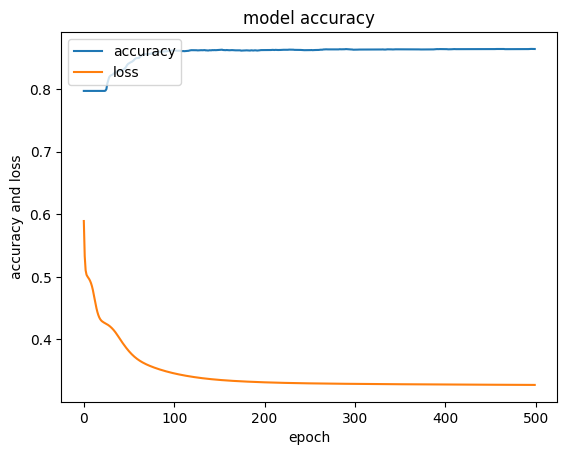

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(["accuracy", "loss"], loc="upper left")
plt.show()

In [11]:
train_acc = np.array(history.history["accuracy"])
print(
    f"iterations before the training accuracy climbed above 80% = {train_acc[train_acc <= 0.8].size + 1}"
)

iterations before the training accuracy climbed above 80% = 26


In [12]:
tr = sc.transform([[0, 0, 1, 650, 1, 60, 2, 300_000, 2, 1, 0, 80_000]])
NNmodel.predict(tr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


array([[0.7461431]], dtype=float32)